In [1]:
import torchaudio
import torch
import soundfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import python_speech_features
from sklearn.preprocessing import StandardScaler
import os
from plot import *

In [103]:
data=np.load('data.npy',allow_pickle=True)

In [108]:
BinaryLabels=[0 for i in range(2)]
TypeLabels=[0 for i in range(8)]
for i in data:
    flag=1 if i[1][4]==True else 0
    BinaryLabels[flag]+=1
    TypeLabels[i[1][7]]+=1
BinaryLabels,TypeLabels

([4555, 1225], [4467, 327, 530, 10, 143, 164, 77, 62])

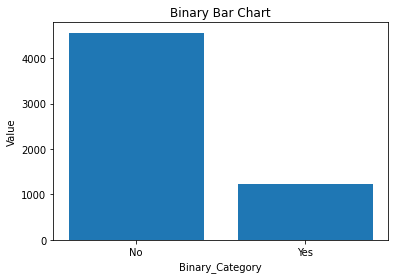

In [125]:
plt.bar(['No','Yes'], BinaryLabels)  
  
plt.title('Binary Bar Chart')  
plt.xlabel('Binary_Category')  
plt.ylabel('Value')  

plt.savefig("pic/Binary Bar Chart.png")
plt.show()

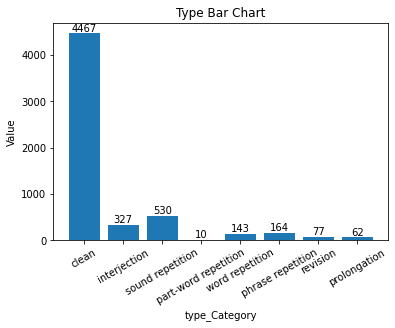

In [126]:
plt.bar(typelist, TypeLabels)  
  
plt.title('Type Bar Chart')  
plt.xlabel('type_Category')  
plt.ylabel('Value')  
for i, v in enumerate(TypeLabels):  
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom') 
plt.xticks(rotation=30)
plt.savefig("pic/Type Bar Chart.png")

plt.show()

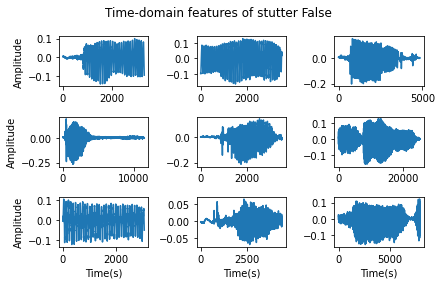

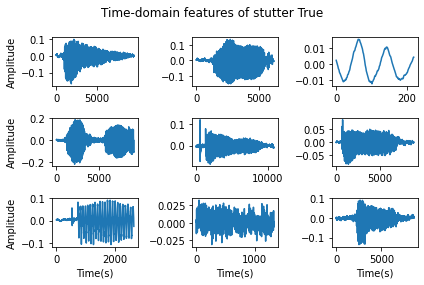

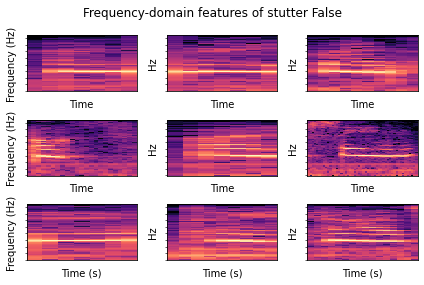

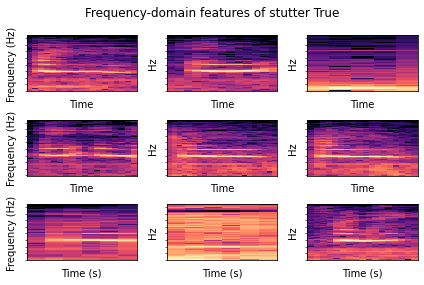

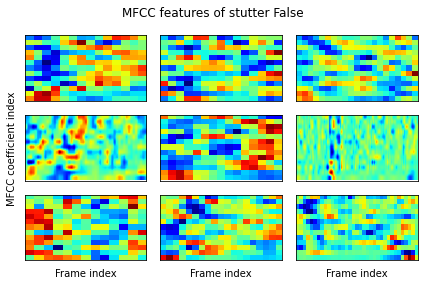

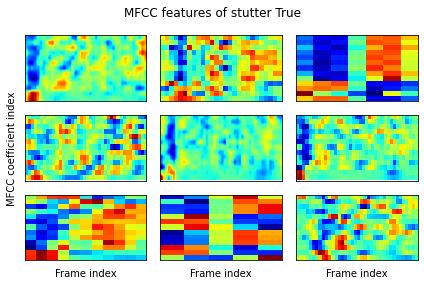

In [109]:
BinarySample=[]
for i in range(2):
    Sample=[]
    for audio_slice in data:
        flag=1 if audio_slice[1][4]==True else 0
        if flag== i:
            Sample.append(audio_slice)
        if len(Sample)==9:
            break
    BinarySample.append(Sample)
    
for index in range(2):
    fig, axs = plt.subplots(3, 3)  
    fig.suptitle("Time-domain features of stutter "+str(True if index else False))
    for i in range(3):  
        for j in range(3):  
            ax=axs[i, j] 
            ax.plot(BinarySample[index][i*3+j][0])  
            if i == 2:  
                ax.set_xlabel('Time(s)')  
            else:  
                ax.set_xlabel('')  
            if j == 0:  
                ax.set_ylabel('Amplitude')  
            else:  
                ax.set_ylabel('')  
    plt.tight_layout()  
    plt.savefig("pic/Time-domain features of stutter "+str(True if index else False)+'.png')
    plt.show()
    
for index in range(2):
    fig, axs = plt.subplots(3, 3)  
    fig.suptitle("Frequency-domain features of stutter "+str(True if index else False))
    for i in range(3):  
        for j in range(3):  
            y, sr = BinarySample[index][i*3+j][0],BinarySample[index][i*3+j][-1]
            if len(y)<2048:
                y=y.repeat(2048//len(y)+1)
            D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)  
            ax = axs[i, j]  
            librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', ax=ax)  
            if i == 2:  
                ax.set_xlabel('Time (s)')  
            if j == 0:  
                ax.set_ylabel('Frequency (Hz)')  
            ax.set_xticks([])  
            ax.set_yticks([])  
    plt.tight_layout()  
    plt.savefig("pic/Frequency-domain features of stutter "+str(True if index else False)+'.png')
    plt.show()

    
for index in range(2):
    fig, axs = plt.subplots(3, 3)  
    fig.suptitle("MFCC features of stutter "+str(True if index else False))
    for i in range(3):  
        for j in range(3):  
            y, sr = BinarySample[index][i*3+j][0],BinarySample[index][i*3+j][-1]
            if len(y)<1024:
                y=np.pad(y, 1024-len(y), 'constant')
               # y=y.repeat(2048//len(y)+1)
            f=python_speech_features.mfcc(y,sr)
            delta_f=python_speech_features.delta(f,2)

            scaler=StandardScaler()
            normal_f=scaler.fit_transform(delta_f)            
            ax = axs[i, j]  
            ax.imshow(normal_f.T, origin='lower',aspect='auto',cmap='jet')
            if i == 2:  
                ax.set_xlabel('Frame index')  
            if j == 0 and i==1:  
                ax.set_ylabel('MFCC coefficient index')  
            ax.set_xticks([])  
            ax.set_yticks([])  
    plt.tight_layout()  
    plt.savefig("pic/MFCC of stutter "+str(True if index else False)+'.png')
    plt.show()

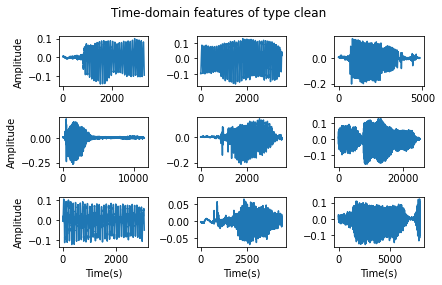

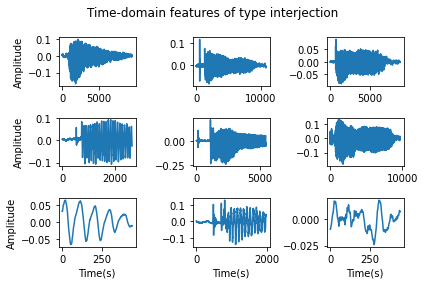

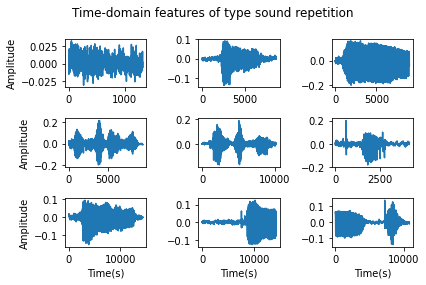

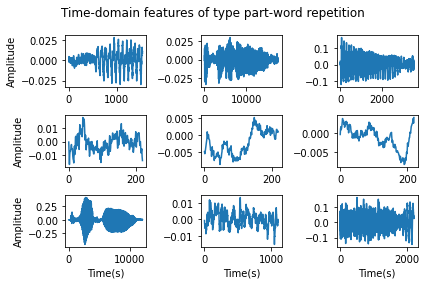

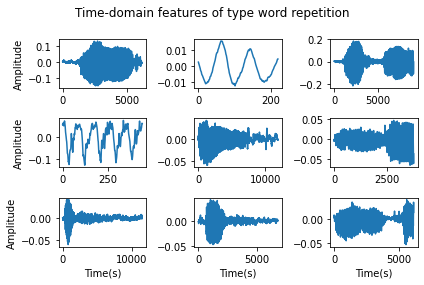

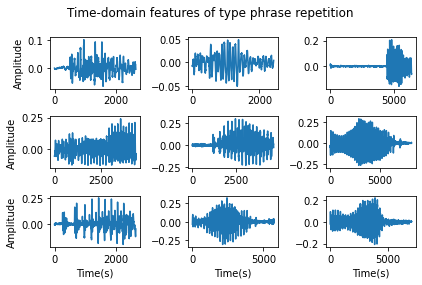

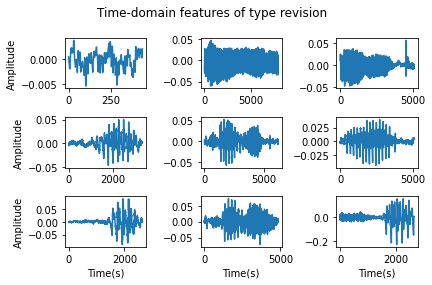

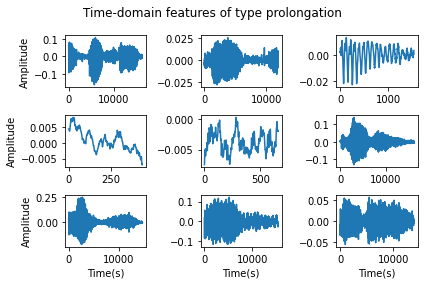

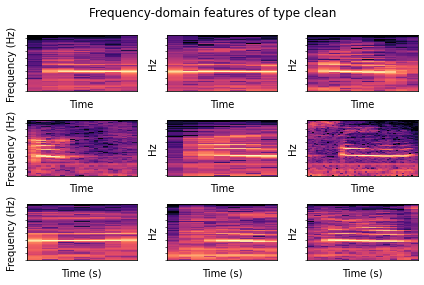

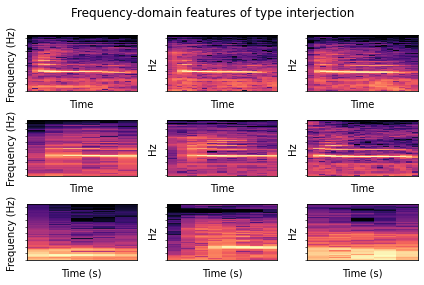

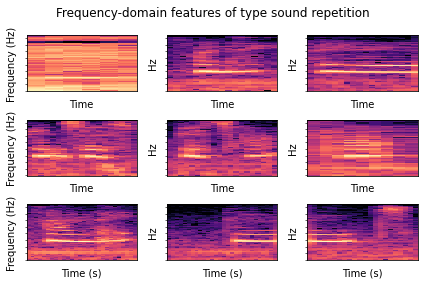

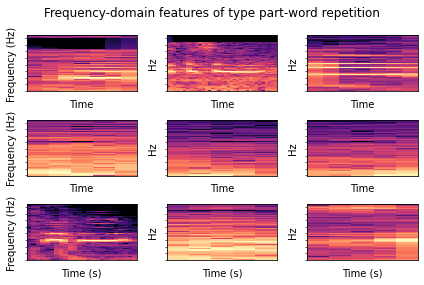

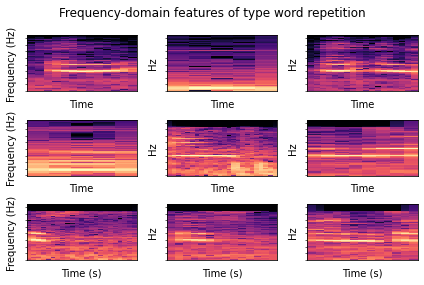

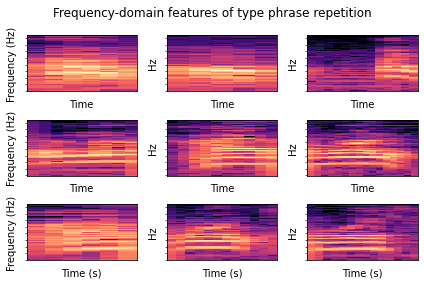

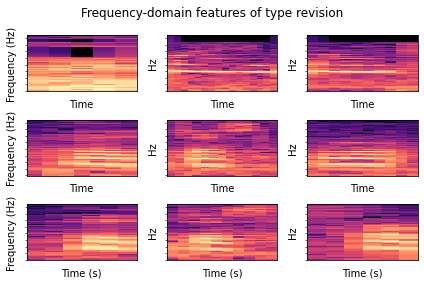

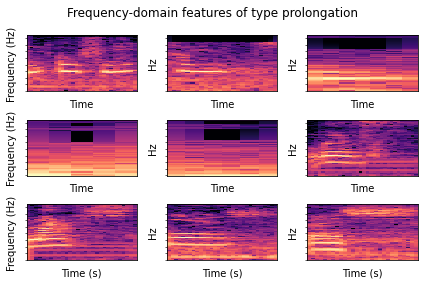

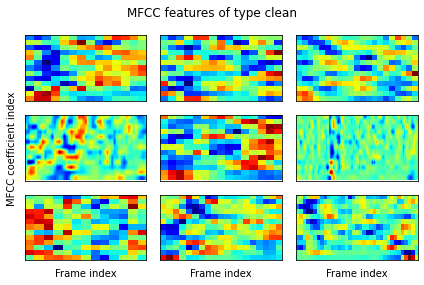

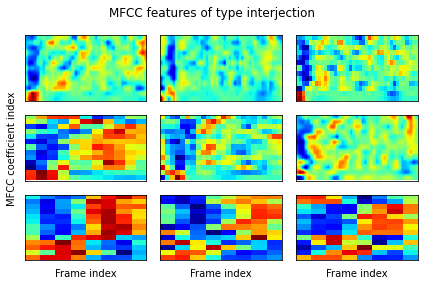

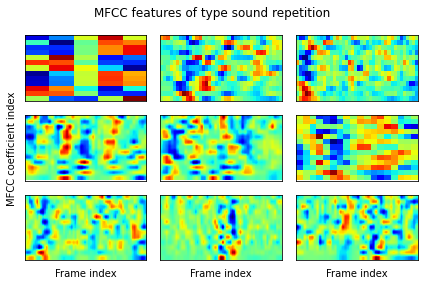

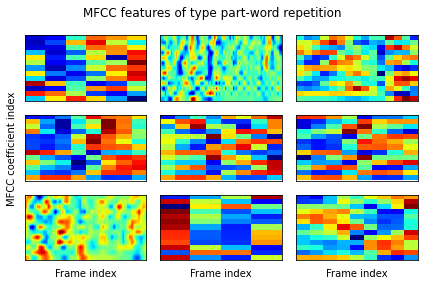

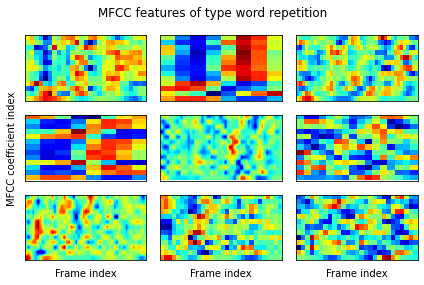

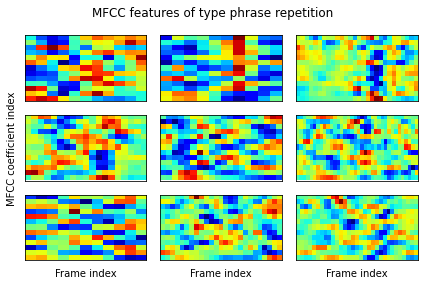

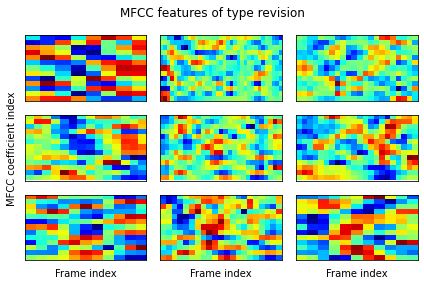

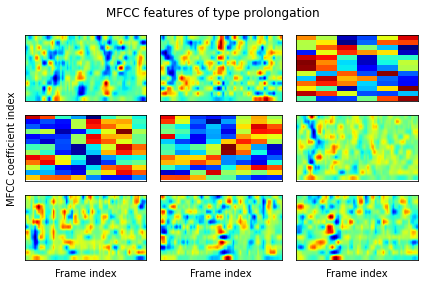

In [88]:
typelist=["clean","interjection","sound repetition","part-word repetition",
          "word repetition","phrase repetition","revision","prolongation"]
typesSample=[]
for i in range(8):
    typeSample=[]
    for audio_slice in data:
        if audio_slice[1][7]==i :
            typeSample.append(audio_slice)
        if len(typeSample)==9:
            break
    typesSample.append(typeSample)
    
for index in range(8):
    fig, axs = plt.subplots(3, 3)  
    fig.suptitle("Time-domain features of type "+typelist[index])
    for i in range(3):  
        for j in range(3):  
            ax=axs[i, j] 
            ax.plot(typesSample[index][i*3+j][0])  
            if i == 2:  
                ax.set_xlabel('Time(s)')  
            else:  
                ax.set_xlabel('')  
            if j == 0:  
                ax.set_ylabel('Amplitude')  
            else:  
                ax.set_ylabel('')  
    plt.tight_layout()  
    plt.savefig("pic/Time-domain features of type "+typelist[index]+'.png')
    plt.show()
    
for index in range(8):
    fig, axs = plt.subplots(3, 3)  
    fig.suptitle("Frequency-domain features of type "+typelist[index])
    for i in range(3):  
        for j in range(3):  
            y, sr = typesSample[index][i*3+j][0],typesSample[index][i*3+j][-1]
            if len(y)<2048:
                y=y.repeat(2048//len(y)+1)
            D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)  
            ax = axs[i, j]  
            librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', ax=ax)  
            if i == 2:  
                ax.set_xlabel('Time (s)')  
            if j == 0:  
                ax.set_ylabel('Frequency (Hz)')  
            ax.set_xticks([])  
            ax.set_yticks([])  
    plt.tight_layout()  
    plt.savefig("pic/Frequency-domain features of type "+typelist[index]+'.png')
    plt.show()

    
for index in range(8):
    fig, axs = plt.subplots(3, 3)  
    fig.suptitle("MFCC features of type "+typelist[index])
    for i in range(3):  
        for j in range(3):  
            y, sr = typesSample[index][i*3+j][0],typesSample[index][i*3+j][-1]
            if len(y)<1024:
                y=np.pad(y, 1024-len(y)//2+1, 'constant')
              #  y=y.repeat(2048//len(y)+1)
            f=python_speech_features.mfcc(y,sr)
            delta_f=python_speech_features.delta(f,2)

            scaler=StandardScaler()
            normal_f=scaler.fit_transform(delta_f)            
            ax = axs[i, j]  
            ax.imshow(normal_f.T, origin='lower',aspect='auto',cmap='jet')
            if i == 2:  
                ax.set_xlabel('Frame index')  
            if j == 0 and i==1:  
                ax.set_ylabel('MFCC coefficient index')  
            ax.set_xticks([])  
            ax.set_yticks([])  
    plt.tight_layout()  
    plt.savefig("pic/MFCC of type "+typelist[index]+'.png')
    plt.show()